In [1]:
# Import necessary modules
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Read the CSV file into a DataFrame: df
df = pd.read_csv('fake_or_real_news.csv')
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [2]:
# Import the necessary modules
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [3]:
# Create a series to store the labels: y
y = df.label
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(df["text"],y,test_size=0.33,random_state=53)
X_train.head()

2576                                                     
1539    Report Copyright Violation Do you think there ...
5163    The election in 232 photos, 43 numbers and 131...
2615    Email Ever wonder what’s on the mind of today’...
4270    Wells Fargo is Rotting from the Top Down Wells...
Name: text, dtype: object

In [4]:
y_train.head()

2576    FAKE
1539    FAKE
5163    REAL
2615    FAKE
4270    FAKE
Name: label, dtype: object

# CountVectorizer for text classification

In [5]:
# Initialize a CountVectorizer object: count_vectorizer
count_vectorizer = CountVectorizer(stop_words="english")

# Transform the training data using only the 'text' column values: count_train 
count_train = count_vectorizer.fit_transform(X_train.values)

# Transform the test data using only the 'text' column values: count_test 
count_test = count_vectorizer.transform(X_test.values)

# TfidfVectorizer for text classification

In [6]:
import warnings
warnings.filterwarnings("ignore")
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize a TfidfVectorizer object: tfidf_vectorizer
tfidf_vectorizer =TfidfVectorizer(stop_words="english",max_df=0.7)

# Transform the training data: tfidf_train 
tfidf_train =tfidf_vectorizer.fit_transform(X_train.values)

# Transform the test data: tfidf_test 
tfidf_test = tfidf_vectorizer.transform(X_test.values)

# Training and testing the "fake news" model with CountVectorizer

In [7]:
# Import the necessary modules
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB

# Instantiate a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier =MultinomialNB()

# Fit the classifier to the training data
nb_classifier.fit(count_train,y_train)

# Create the predicted tags: pred
pred =nb_classifier.predict(count_test)

# Calculate the accuracy score: score
score =metrics.accuracy_score(y_test,pred)
print(score)

0.893352462936394


In [8]:
# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test,pred,labels=['FAKE', 'REAL'])
print(cm)

[[ 865  143]
 [  80 1003]]


In [9]:
import matplotlib.pyplot as plt
import itertools
%matplotlib inline
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


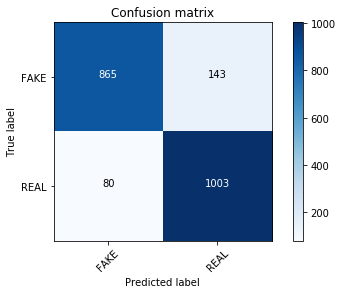

In [10]:
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

# Training and testing the "fake news" model with TfidfVectorizer

In [11]:
# Create a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier =MultinomialNB()

# Fit the classifier to the training data
nb_classifier.fit(tfidf_train,y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(tfidf_test)

# Calculate the accuracy score: score
score =metrics.accuracy_score(y_test,pred)
print(score)

0.8565279770444764


In [12]:
# Calculate the confusion matrix: cm
cm =metrics.confusion_matrix(y_test,pred,labels=['FAKE', 'REAL'])
print(cm)

[[ 739  269]
 [  31 1052]]


Confusion matrix, without normalization


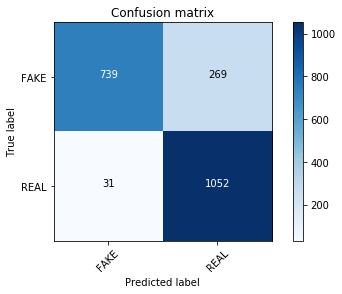

In [13]:
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

# Improving model

In [14]:
# Create the list of alphas: alphas
alphas = np.arange(0,1,0.1)

# Define train_and_predict()
def train_and_predict(alpha):
    # Instantiate the classifier: nb_classifier
    nb_classifier = MultinomialNB(alpha=alpha)
    # Fit to the training data
    nb_classifier.fit(tfidf_train,y_train)
    # Predict the labels: pred
    pred = nb_classifier.predict(tfidf_test)
    # Compute accuracy: score
    score = metrics.accuracy_score(y_test,pred)
    return score

# Iterate over the alphas and print the corresponding score
for alpha in alphas:
    print('Alpha: ', alpha)
    print('Score: ', train_and_predict(alpha))
    print()

Alpha:  0.0
Score:  0.8813964610234337

Alpha:  0.1
Score:  0.8976566236250598

Alpha:  0.2
Score:  0.8938307030129125

Alpha:  0.30000000000000004
Score:  0.8900047824007652

Alpha:  0.4
Score:  0.8857006217120995

Alpha:  0.5
Score:  0.8842659014825442

Alpha:  0.6000000000000001
Score:  0.874701099952176

Alpha:  0.7000000000000001
Score:  0.8703969392635102

Alpha:  0.8
Score:  0.8660927785748446

Alpha:  0.9
Score:  0.8589191774270684



# Inspecting model

In [15]:
# Get the class labels: class_labels
class_labels = nb_classifier.classes_

# Extract the features: feature_names
feature_names = tfidf_vectorizer.get_feature_names()

# Zip the feature names together with the coefficient array and sort by weights: feat_with_weights
feat_with_weights = sorted(zip(nb_classifier.coef_[0], feature_names))

# Print the first class label and the top 20 feat_with_weights entries
print(class_labels[0], feat_with_weights[:20])

FAKE [(-11.316312804238807, '0000'), (-11.316312804238807, '000035'), (-11.316312804238807, '0001'), (-11.316312804238807, '0001pt'), (-11.316312804238807, '000km'), (-11.316312804238807, '0011'), (-11.316312804238807, '006s'), (-11.316312804238807, '007'), (-11.316312804238807, '007s'), (-11.316312804238807, '008s'), (-11.316312804238807, '0099'), (-11.316312804238807, '00am'), (-11.316312804238807, '00p'), (-11.316312804238807, '00pm'), (-11.316312804238807, '014'), (-11.316312804238807, '015'), (-11.316312804238807, '018'), (-11.316312804238807, '01am'), (-11.316312804238807, '020'), (-11.316312804238807, '023')]


In [16]:
# Print the second class label and the bottom 20 feat_with_weights entries
print(class_labels[1], feat_with_weights[-20:])

REAL [(-7.742481952533027, 'states'), (-7.717550034444668, 'rubio'), (-7.703583809227384, 'voters'), (-7.654774992495461, 'house'), (-7.649398936153309, 'republicans'), (-7.6246184189367, 'bush'), (-7.616556675728882, 'percent'), (-7.545789237823644, 'people'), (-7.516447881078008, 'new'), (-7.448027933291952, 'party'), (-7.4111484102034755, 'cruz'), (-7.410910239085596, 'state'), (-7.35748985914622, 'republican'), (-7.33649923948987, 'campaign'), (-7.2854057032685775, 'president'), (-7.2166878130917755, 'sanders'), (-7.108263114902301, 'obama'), (-6.72477133248804, 'clinton'), (-6.565395438992684, 'said'), (-6.328486029596207, 'trump')]


# Passive Aggressive Classifier

accuracy:   0.936
Confusion matrix, without normalization


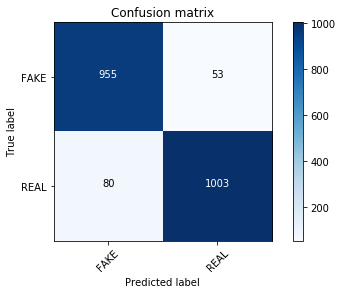

In [17]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf=PassiveAggressiveClassifier(n_iter=50)
linear_clf.fit(tfidf_train, y_train)
pred = linear_clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [18]:
# Get the class labels: class_labels
class_labels = linear_clf.classes_

# Extract the features: feature_names
feature_names = tfidf_vectorizer.get_feature_names()

# Zip the feature names together with the coefficient array and sort by weights: feat_with_weights
feat_with_weights = sorted(zip(linear_clf.coef_[0], feature_names))

# Print the first class label and the top 20 feat_with_weights entries
print(class_labels[0], feat_with_weights[:20])

FAKE [(-5.101971000441429, '2016'), (-4.1728056302045635, 'hillary'), (-4.135415694854285, 'october'), (-3.1701790550164453, 'share'), (-2.959151024084371, 'article'), (-2.7702743274498416, 'november'), (-2.501793172599842, 'print'), (-2.4832088427991432, 'email'), (-2.3888373155247185, 'source'), (-2.2678561650708375, 'oct'), (-2.1623172568245015, 'war'), (-2.1001502424876883, 'advertisement'), (-2.0656792959491246, 'nov'), (-2.062209980344451, 'election'), (-2.0152129510605112, 'mosul'), (-1.9568666125911616, 'podesta'), (-1.906426510841943, 'establishment'), (-1.8024918183799932, 'donald'), (-1.7947648839060313, 'corporate'), (-1.7781510739778386, 'snip')]


In [19]:
# Print the second class label and the bottom 20 feat_with_weights entries
print(class_labels[1], feat_with_weights[-20:])

REAL [(1.7665277921208649, 'presumptive'), (1.8347715145669772, 'deal'), (1.9536422165471714, 'continue'), (1.9796594605621545, 'attacks'), (1.9798321145639028, 'march'), (2.007884831148331, 'conservative'), (2.0113639722778083, 'rush'), (2.0623484868828443, 'debate'), (2.0978409968393277, 'monday'), (2.1628966613821414, 'jobs'), (2.1815120525924807, 'sunday'), (2.2004222077480984, 'candidates'), (2.292777229918594, 'cruz'), (2.3412457982930883, 'islamic'), (2.3723263308822395, 'marriage'), (2.4162232749945574, 'gop'), (2.4477291013411526, 'says'), (2.469745638420949, 'tuesday'), (2.5014438139430037, 'friday'), (4.907132376905524, 'said')]


# SVC

accuracy:   0.928
Confusion matrix, without normalization


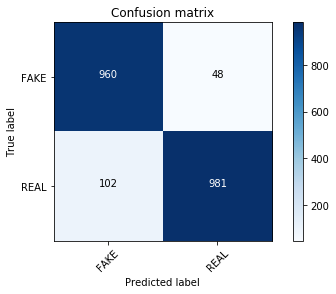

In [24]:
from sklearn.svm import SVC
svc =SVC(C=10000,kernel='linear')
svc.fit(tfidf_train, y_train)
pred = svc.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])